In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cv2
import shutil

In [2]:
# Create a new directory for storing processed images
new_directory = '/kaggle/working/tas/'
os.makedirs(new_directory, exist_ok=True)

In [3]:
# Read the CSV file containing fashion product data
data = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', on_bad_lines='skip')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [4]:
# Display unique values in the 'articleType' column
data['articleType'].unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [5]:
# Define paths for input images and the directory to save processed images
IMG_PATH = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/'
SAVE_PATH = '/kaggle/working/tas/'

In [6]:
# Group data by 'articleType' and count the number of images for each type
data_per_type = data.groupby(['articleType']).agg(count_img=('articleType', 'count')).sort_values(by='count_img', ascending=False).reset_index()
data_per_type

,articleType,count_img
0,Tshirts,7067
1,Shirts,3217
2,Casual Shoes,2845
3,Watches,2542
4,Sports Shoes,2036
...,...,...
138,Ipad,1
139,Cushion Covers,1
140,Body Wash and Scrub,1
141,Shoe Laces,1


In [7]:
# Display unique values in the 'articleType' column after grouping
data_per_type['articleType'].unique()

array(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses', 'Wallets',
       'Flip Flops', 'Sandals', 'Briefs', 'Belts', 'Backpacks', 'Socks',
       'Formal Shoes', 'Perfume and Body Mist', 'Jeans', 'Shorts',
       'Trousers', 'Flats', 'Bra', 'Dresses', 'Sarees', 'Earrings',
       'Deodorant', 'Nail Polish', 'Lipstick', 'Track Pants', 'Clutches',
       'Sweatshirts', 'Caps', 'Sweaters', 'Ties', 'Jackets',
       'Innerwear Vests', 'Kurtis', 'Tunics', 'Nightdress', 'Leggings',
       'Pendant', 'Capris', 'Necklace and Chains', 'Lip Gloss',
       'Night suits', 'Trunk', 'Skirts', 'Scarves', 'Ring', 'Dupatta',
       'Cufflinks', 'Kajal and Eyeliner', 'Accessory Gift Set',
       'Kurta Sets', 'Free Gifts', 'Stoles', 'Duffel Bag', 'Bangle',
       'Laptop Bag', 'Foundation and Primer', 'Sports Sandals',
       'Bracelet', 'Face Moisturisers', 'Lounge Pants', 'Jewellery Set',
       'Fragrance Gift Set', 'Highligh

In [8]:
# Create a DataFrame containing products of certain types
data_tas = data_per_type[
    (data_per_type['articleType']=='Casual Shoes')|
    (data_per_type['articleType']=='Tablet Sleeve')|
    (data_per_type['articleType']=='Necklace and Chains')|
    (data_per_type['articleType']=='Gloves')|
    (data_per_type['articleType']=='Belts')|
    (data_per_type['articleType']=='Night suits')|
    (data_per_type['articleType']=='Lounge Tshirts')
]
data_tas

,articleType,count_img
2,Casual Shoes,2845
14,Belts,813
44,Necklace and Chains,160
46,Night suits,141
89,Gloves,20
128,Lounge Tshirts,3
131,Tablet Sleeve,3


In [9]:
# Filter data to include only 'Belts' and 'Gloves'
tas_type = ['Belts', 'Gloves']

In [10]:
# Loop through the data to process and save images
i = 0
idx_list = []

for idx, img_type in enumerate(data['articleType']):
    if img_type in tas_type:
        img_id = str(data['id'][idx])+'.jpg'
        idx_list.append([img_id])
        img_path = os.path.join(IMG_PATH, img_id)
        if i <= 1000:
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            filename = os.path.join(SAVE_PATH, img_id)
            cv2.imwrite(filename, cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i+=1
            
print(i)

833


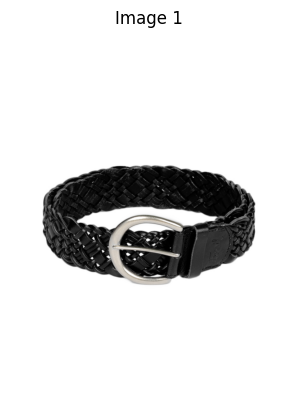

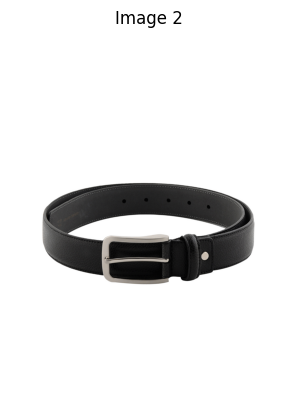

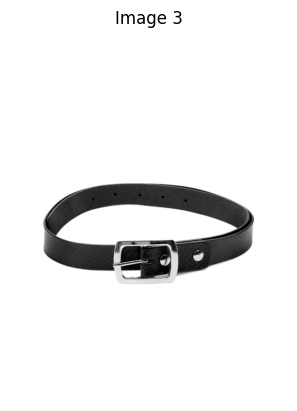

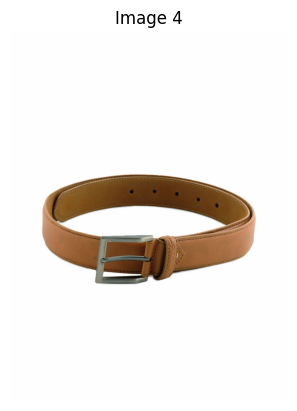

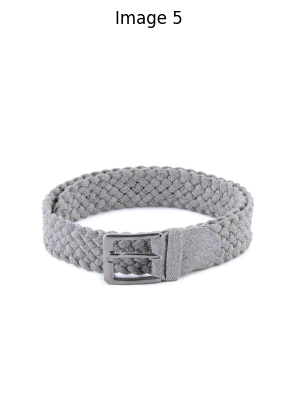

Total images processed: 5


In [16]:
i = 0
idx_list = []

for idx, img_type in enumerate(data['articleType']):
    if img_type in tas_type:
        img_id = str(data['id'][idx]) + '.jpg'
        idx_list.append([img_id])
        img_path = os.path.join(IMG_PATH, img_id)
        if i < 5:  # Change this condition to display a different number of images
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Display the image
            plt.imshow(img_rgb)
            plt.title(f"Image {i+1}")
            plt.axis('off')
            plt.show()

        i += 1

    if i >= 5:  # Stop after displaying 5 images
        break

print(f"Total images processed: {i}")
